In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report
import pickle

In [94]:
import pandas as pd

df = pd.read_csv('ipl_matches.csv')

print(df.head())

print(df.info)

   id    Season       city        date                        team1  \
0   1  IPL-2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2  IPL-2017       Pune  06-04-2017               Mumbai Indians   
2   3  IPL-2017     Rajkot  07-04-2017                Gujarat Lions   
3   4  IPL-2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5  IPL-2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hy

In [96]:
df.shape

(756, 18)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [100]:
df.duplicated().sum()

0

In [102]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [104]:
df['city'].fillna("Unknown",inplace=True)
df.dropna(subset=['winner'],inplace=True)
df['player_of_match'].fillna("Unknown", inplace=True)
df['umpire1'].fillna(df['umpire1'].mode()[0],inplace=True)
df['umpire2'].fillna(df['umpire2'].mode()[0],inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20852\2137889283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['city'].fillna("Unknown",inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20852\2137889283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [106]:
df.drop(columns=['umpire3'],inplace=True)

In [108]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [110]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,752.000000,752.000000,752.000000,752.000000
mean,1784.746011,0.025266,13.353723,3.368351
std,3455.152925,0.157036,23.513486,3.388114
min,1.000000,0.000000,0.000000,0.000000
25%,188.750000,0.000000,0.000000,0.000000
50%,377.500000,0.000000,0.000000,4.000000
75%,566.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


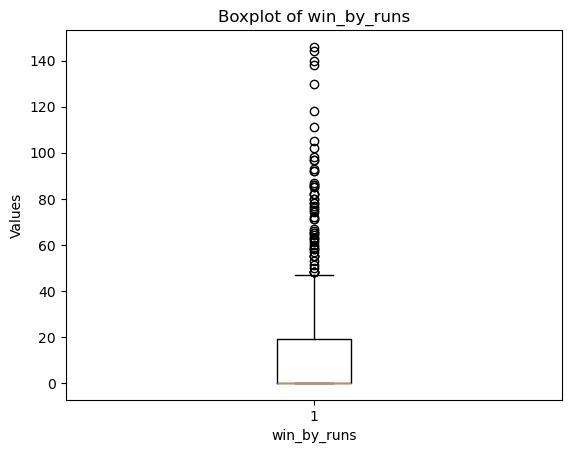

In [112]:
plt.boxplot(df['win_by_runs'])
plt.title('Boxplot of win_by_runs')
plt.xlabel('win_by_runs')
plt.ylabel('Values')
plt.show()

In [114]:
Q1=df['win_by_runs'].quantile(0.25)
Q3=df['win_by_runs'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_1=df[(df['win_by_runs']>=lower_bound) & (df['win_by_runs']<=upper_bound)]
df_1.shape

(694, 17)

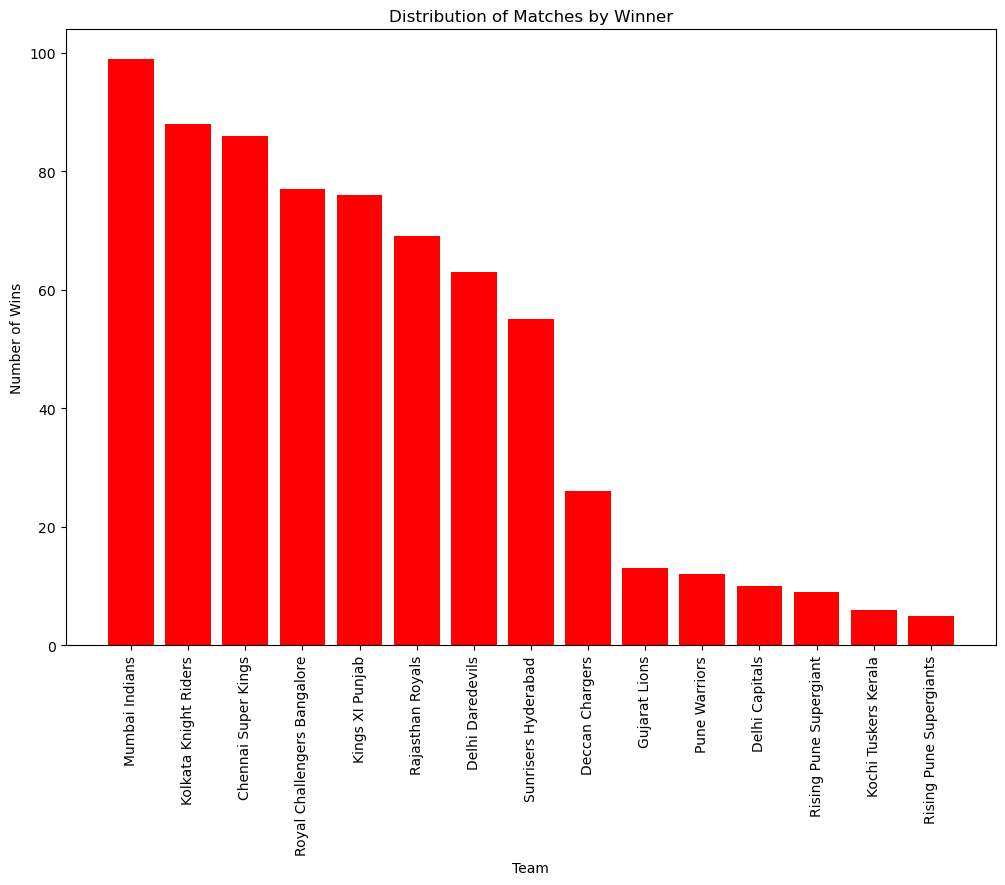

In [116]:
winner_counts=df_1['winner'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(winner_counts.index,winner_counts.values,color='red')
plt.title('Distribution of Matches by Winner')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

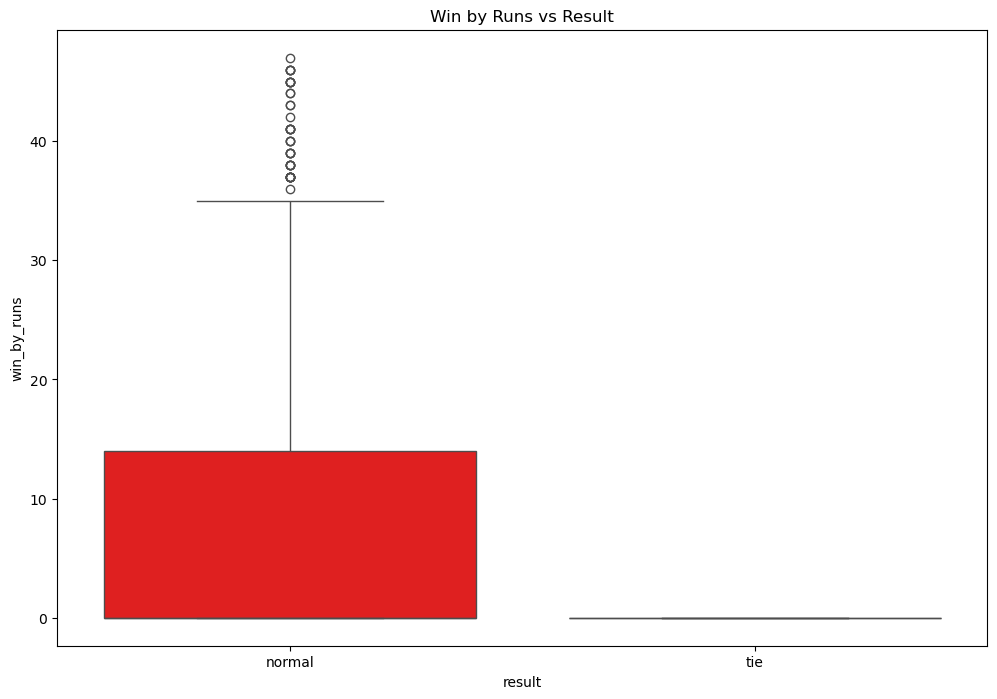

In [118]:
plt.figure(figsize=(12,8))
sns.boxplot(x='result', y='win_by_runs', data=df_1,color='red')
plt.title('Win by Runs vs Result')
plt.show()

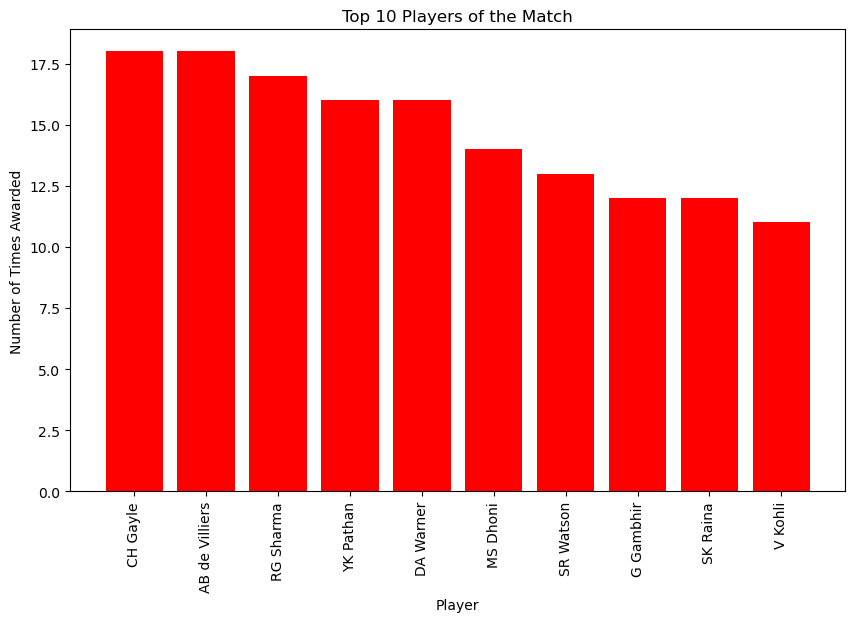

In [120]:
top_players = df_1['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(top_players.index, top_players.values, color='red')
plt.title('Top 10 Players of the Match')
plt.xlabel('Player')
plt.ylabel('Number of Times Awarded')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Toss Decision Outcome (Bat/Bowl)')

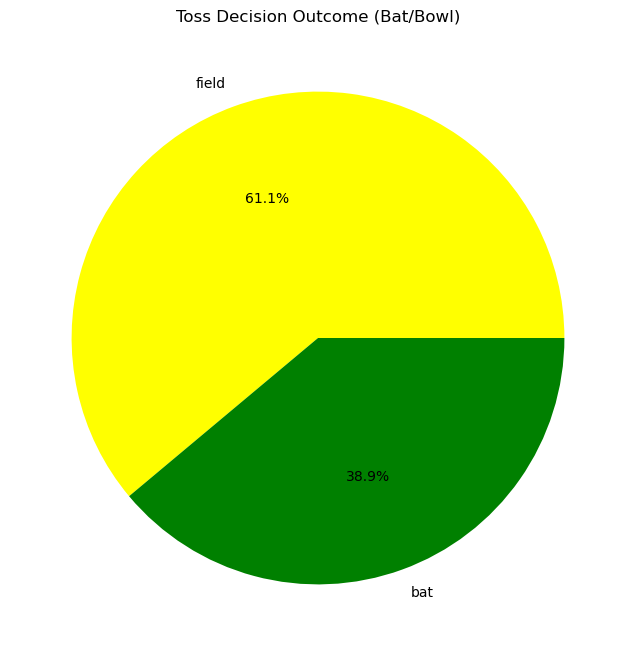

In [122]:
plt.figure(figsize=(12,8))
toss_decision_counts = df_1['toss_decision'].value_counts()
plt.pie(toss_decision_counts,labels=toss_decision_counts.index,autopct='%1.1f%%',colors=['yellow', 'green'])
plt.title('Toss Decision Outcome (Bat/Bowl)')


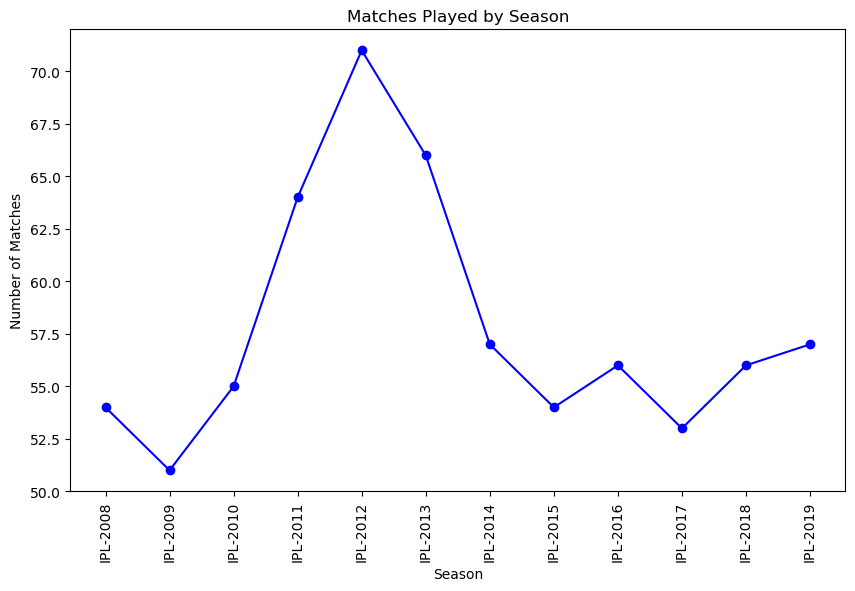

In [124]:
season_counts = df_1['Season'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(season_counts.index, season_counts.values, marker='o', color='blue')
plt.title('Matches Played by Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

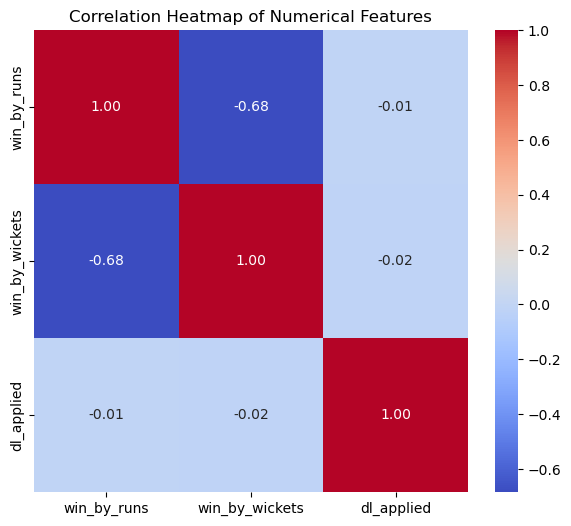

In [126]:
plt.figure(figsize=(7,6))
numerical_cols = ['win_by_runs', 'win_by_wickets', 'dl_applied']
corr = df_1[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [128]:
df_1=df_1.drop(columns=['id','date'])

In [130]:
categorical_columns=['Season', 'city','team1', 'team2', 'toss_winner','toss_decision', 'result','player_of_match', 'venue', 'umpire1','umpire2','winner']

In [132]:
le=LabelEncoder()

In [134]:
for col in categorical_columns:
  df_1[col]=le.fit_transform(df_1[col])

In [136]:
df_1.head()

,Season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,9,14,14,13,13,1,0,0,14,35,0,219,28,6,34
1,9,26,8,11,11,1,0,0,11,0,7,194,21,1,49
2,9,28,4,7,7,1,0,0,7,0,10,33,31,38,16
3,9,15,11,5,5,1,0,0,5,0,6,59,13,3,14
4,9,2,13,3,13,0,0,0,13,15,0,96,17,22,14


In [138]:
x=df_1.drop('winner',axis=1)

In [140]:
y=df_1['winner']

In [142]:
scaler=StandardScaler()

In [144]:
x_scaled=scaler.fit_transform(x)

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [148]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(n_jobs=4)
}

In [150]:
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Classification Report': report
    }

for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"\nClassification Report:\n{metrics['Classification Report']}")

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\m


Logistic Regression Results:
Accuracy: 0.2878

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.47      0.41        19
           1       0.14      0.11      0.12         9
           2       0.00      0.00      0.00         3
           3       0.08      0.10      0.09        10
           4       0.00      0.00      0.00         4
           5       0.20      0.10      0.13        10
           6       0.00      0.00      0.00         1
           7       0.50      0.50      0.50        16
           8       0.25      0.21      0.23        24
           9       0.00      0.00      0.00         1
          10       0.33      0.36      0.35        11
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.39      0.53      0.45        17
          14       0.14      0.17      0.15        12

    accuracy                           0.29       139
   macro 

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [152]:
rfc_model=models['Random Forest']

In [154]:
params_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [156]:
grid_model=GridSearchCV(estimator=rfc_model,param_grid=params_grid,cv=5,verbose=3,scoring='accuracy')

In [158]:
grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Asus\anaconda3\Lib\site-packages\sk

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [160]:
grid_model.best_score_

0.7729729729729728

In [162]:
best_params=grid_model.best_params_
best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [164]:
best_model = grid_model.best_estimator_

In [166]:
y_pred1=best_model.predict(x_test)

In [168]:
print(accuracy_score(y_test, y_pred1))

0.8129496402877698


In [170]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.33      0.50         9
           2       1.00      0.33      0.50         3
           3       0.50      0.60      0.55        10
           4       1.00      1.00      1.00         4
           5       0.62      1.00      0.77        10
           6       0.00      0.00      0.00         1
           7       0.82      0.88      0.85        16
           8       0.79      0.79      0.79        24
           9       0.00      0.00      0.00         1
          10       0.91      0.91      0.91        11
          11       0.00      0.00      0.00         2
          13       0.89      0.94      0.91        17
          14       0.92      0.92      0.92        12

    accuracy                           0.81       139
   macro avg       0.67      0.62      0.62       139
weighted avg       0.81      0.81      0.79       139



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [172]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.33      0.50         9
           2       1.00      0.33      0.50         3
           3       0.50      0.60      0.55        10
           4       1.00      1.00      1.00         4
           5       0.62      1.00      0.77        10
           6       0.00      0.00      0.00         1
           7       0.82      0.88      0.85        16
           8       0.79      0.79      0.79        24
           9       0.00      0.00      0.00         1
          10       0.91      0.91      0.91        11
          11       0.00      0.00      0.00         2
          13       0.89      0.94      0.91        17
          14       0.92      0.92      0.92        12

    accuracy                           0.81       139
   macro avg       0.67      0.62      0.62       139
weighted avg       0.81      0.81      0.79       139



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [174]:
with open('final_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [178]:
with open('final_xgb_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [180]:
y_pred_loaded = loaded_model.predict(x_test)